# Grupo

Carlos Gabriel da Silva Machado - 1815080079

Victor Hugo Santos de Lima - 1915080025

Gabriella Rabelo Monteiro - 1915080011

Josué Costa dos Santos Alves - 1715080615

# Bibliotecas Utilizadas

In [1]:
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parte 1 - Resolvendo um Problema Linearmente Separável

In [2]:
base_path = "database/"
dataset = np.fromfile(base_path + "dataAll.txt")
# np.set_printoptions(threshold=sys.maxsize)
print(f"O dataset é formado por: {dataset.shape} exemplos.")

O dataset é formado por: (3000,) exemplos.


In [3]:
# separando as entradas com seus respectivos valores de x1, x2 e yd


splited_dataset = np.array(np.split(dataset, 1000))

In [4]:
print(f"Desta forma, o data set fica divido da seguinte forma: {splited_dataset.shape}.")
print(f"Por exemplo: {splited_dataset[0]}")

Desta forma, o data set fica divido da seguinte forma: (1000, 3).
Por exemplo: [-363.7884  244.1423    0.    ]


In [5]:
# As primeiras entradas


print(splited_dataset[:5])

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 [ 536.5905  764.9575    0.    ]
 [ 314.2297  343.8375    0.    ]]


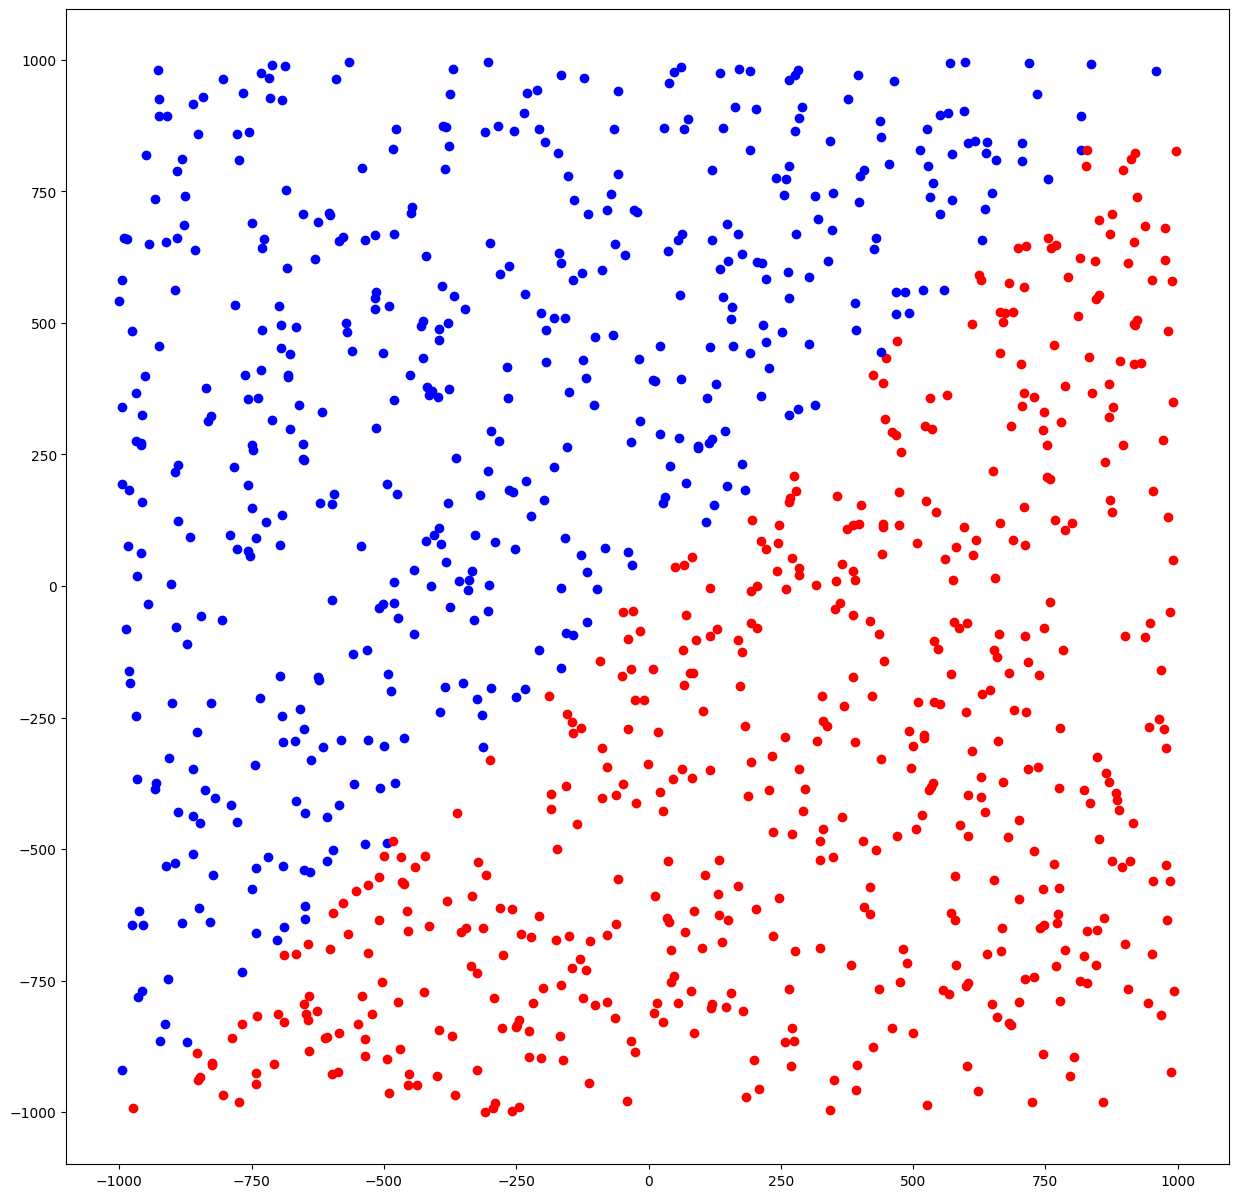

In [6]:
# Distribuição do dataset (graficamente)


plt.subplots(figsize=(15, 15))

for i in range (splited_dataset.shape[0]):
    x = splited_dataset[i][0]
    y = splited_dataset[i][1]
    
    if splited_dataset[i][2] < 1:
        y_blue = splited_dataset[i][1]
        plt.scatter(x, y_blue, c='blue')
    else:
        y_red = splited_dataset[i][1]
        plt.scatter(x, y_red, c='red')

        
plt.show()

In [7]:
# definindo o viés (bias) igual a 1 a cada entrada


splited_dataset_ = np.concatenate((np.ones((splited_dataset.shape[0], 1)), splited_dataset), axis=1)

print(splited_dataset_[0:5])

[[   1.     -363.7884  244.1423    0.    ]
 [   1.      328.7572 -256.7658    1.    ]
 [   1.     -164.9827  613.2164    0.    ]
 [   1.      536.5905  764.9575    0.    ]
 [   1.      314.2297  343.8375    0.    ]]


In [8]:
# Gerando pesos aleatórios no intervalo de [-0.5,0.5)


np.random.seed(0)
weights = np.random.uniform(-0.5, 0.5, 3)
print(f"Pesos: {weights[0:5]}")
weights.reshape(3, 1)

Pesos: [0.0488135  0.21518937 0.10276338]


array([[0.0488135 ],
       [0.21518937],
       [0.10276338]])

In [9]:
# Criar função para a regra delta


def delta_rule(w, l, yd, yp, en):
    new_w = w + (l * (yd - yp) * en)
    return new_w

In [10]:
# Criar função de ativação degrau


def act_func(value):
    if value >= 0:
        return 1
    else:
        return 0

In [11]:
# Criar função do processo de aprendizagem do neurônio Perceptron de Rosenblatt
def learning_process(entradas, pesos, learning_rate):
    i = 0
    j = 0
    epoca = 0
    pesos_antigo = np.ones((len(pesos),1))
    mat_pesos = pesos
    prim_peso = pesos
    ult_peso = np.ones((len(pesos),1))
    alt_pesos = 0
    
    while not np.array_equal(prim_peso, ult_peso):
        epoc_alt = 0
        prim_peso = ult_peso
        print("Época", epoca + 1)
        
        for i in range(len(entradas)):
            result = 0
            
            for j in range(len(entradas[0]) - 1):
                aux = (entradas[i][j]*pesos[j])
                result = aux + result
            ativacao = act_func(result)
            
            if ativacao != (int(entradas[i][3])):
                pesos = np.squeeze(pesos)
                mat_pesos = delta_rule(pesos, learning_rate, int(entradas[i][3]), ativacao, entradas[i][0:3])
            pesos_antigo = pesos
            novo_p = np.diag(mat_pesos)
            novo_p = novo_p[novo_p != 0]
            pesos = novo_p
            
            if np.array_equal(pesos_antigo, pesos):
                alt_pesos = alt_pesos + 1
                epoc_alt = epoc_alt + 1
        epoca = epoca + 1
        print(f"{epoc_alt} alterações na época {epoca}")
        print("-" * 30)
        ult_peso = pesos

    print(f"Passaram {epoca} épocas")
    print(f"Ocorreram {alt_pesos} ajustes de peso")
    print("Pesos finais:",pesos)

    return (pesos[0], pesos[1], pesos[2])

In [12]:
# Criar função para encontrar a equação da reta que separa linearmente o problema


def find_line(w0 ,w1, w2):
    c = (w0/w2)
    mx = - (w1/w2)

    return (c, mx)

In [13]:
w0, w1, w2 = learning_process(splited_dataset_, weights, 0.1)

Época 1
953 alterações na época 1
------------------------------
Época 2
977 alterações na época 2
------------------------------
Época 3
974 alterações na época 3
------------------------------
Época 4
982 alterações na época 4
------------------------------
Época 5
986 alterações na época 5
------------------------------
Época 6
987 alterações na época 6
------------------------------
Época 7
994 alterações na época 7
------------------------------
Época 8
982 alterações na época 8
------------------------------
Época 9
997 alterações na época 9
------------------------------
Época 10
997 alterações na época 10
------------------------------
Época 11
997 alterações na época 11
------------------------------
Época 12
997 alterações na época 12
------------------------------
Época 13
985 alterações na época 13
------------------------------
Época 14
1000 alterações na época 14
------------------------------
Passaram 14 épocas
Ocorreram 13808 ajustes de peso
Pesos finais: [   1.4488135 

In [14]:
# removendo o viés (bias) das entradas



splited_dataset__ = np.array(np.split(dataset, 1000))

print(f"Ao remover o viés: {splited_dataset__.shape} (a quantidade de amostras se mantém)")

print(f"Exemplo:\n{splited_dataset__[:5]}")

Ao remover o viés: (1000, 3) (a quantidade de amostras se mantém)
Exemplo:
[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 [ 536.5905  764.9575    0.    ]
 [ 314.2297  343.8375    0.    ]]


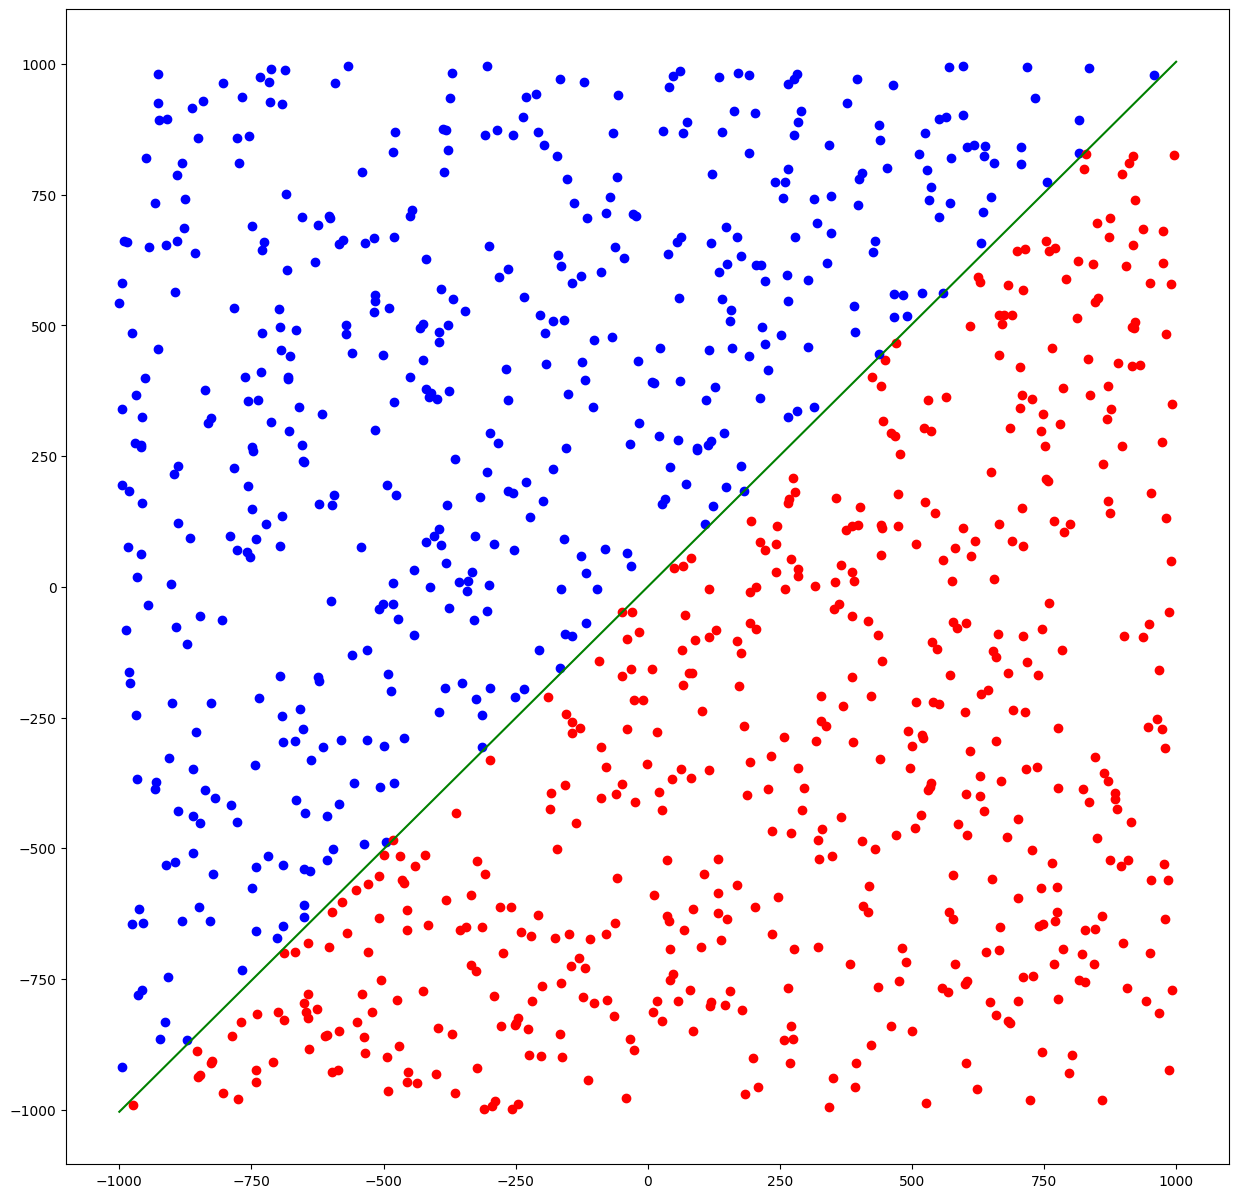

In [15]:
# Gráfico com a reta gerada a partir dos valores resultantes do processo de aprendizado


plt.subplots(figsize=(15, 15))

c, mx =  find_line(w0, w1, w2)
x1 = np.linspace(-1000, 1000, 10)
y1 = mx*x1 - c

plt.plot(x1, y1, 'green')

for i in range (len(splited_dataset)):
    x = splited_dataset[i][0]
    #print(dataAll_split[i][0])
    y = splited_dataset[i][1]
    #print(dataAll_split[i][1])
    #print(dataAll_split[i][2])
    if splited_dataset[i][2] < 1:
        y_blue = splited_dataset[i][1]
        plt.scatter(x, y_blue, c='blue')
    else:
        y_red = splited_dataset[i][1]
        plt.scatter(x, y_red, c='red')


plt.show()

# Parte 2 - Experimentação

In [16]:
# Soma do ultimo digito da matrícula de cada integrante da equipe
# Depois é aplicado o modulo (resto da divisão)
alfa = (9 + 5 + 1 + 5) % 4

print(f"Resultado: {alfa}")

Resultado: 0


In [17]:
# Ler o arquivo com a base de dados

dataset_2 = np.fromfile(base_path + f"data{alfa}.txt")
print(f"O dataset é formado por: {dataset_2.shape}.\nPossui {dataset_2.shape[0]} exemplos.")

O dataset é formado por: (1800,).
Possui 1800 exemplos.


In [18]:
dataset_2_splited = np.array(np.split(dataset_2, 600))

In [19]:
taxa_aprendizagem = np.array([0.4, 0.01, 0.1])
intervalos_pesos_1 = np.random.uniform(-0.5, 0.5, 3)
intervalos_pesos_1.reshape(3, 1)
intervalos_pesos_2 = np.random.uniform(-100, 100, 3)
intervalos_pesos_1.reshape(3, 1)

array([[ 0.04488318],
       [-0.0763452 ],
       [ 0.14589411]])

In [20]:
dataset_2_splited_ = np.concatenate((np.ones((dataset_2_splited.shape[0], 1)), dataset_2_splited), axis=1)

In [21]:
dataset_2_splited_.shape

(600, 4)

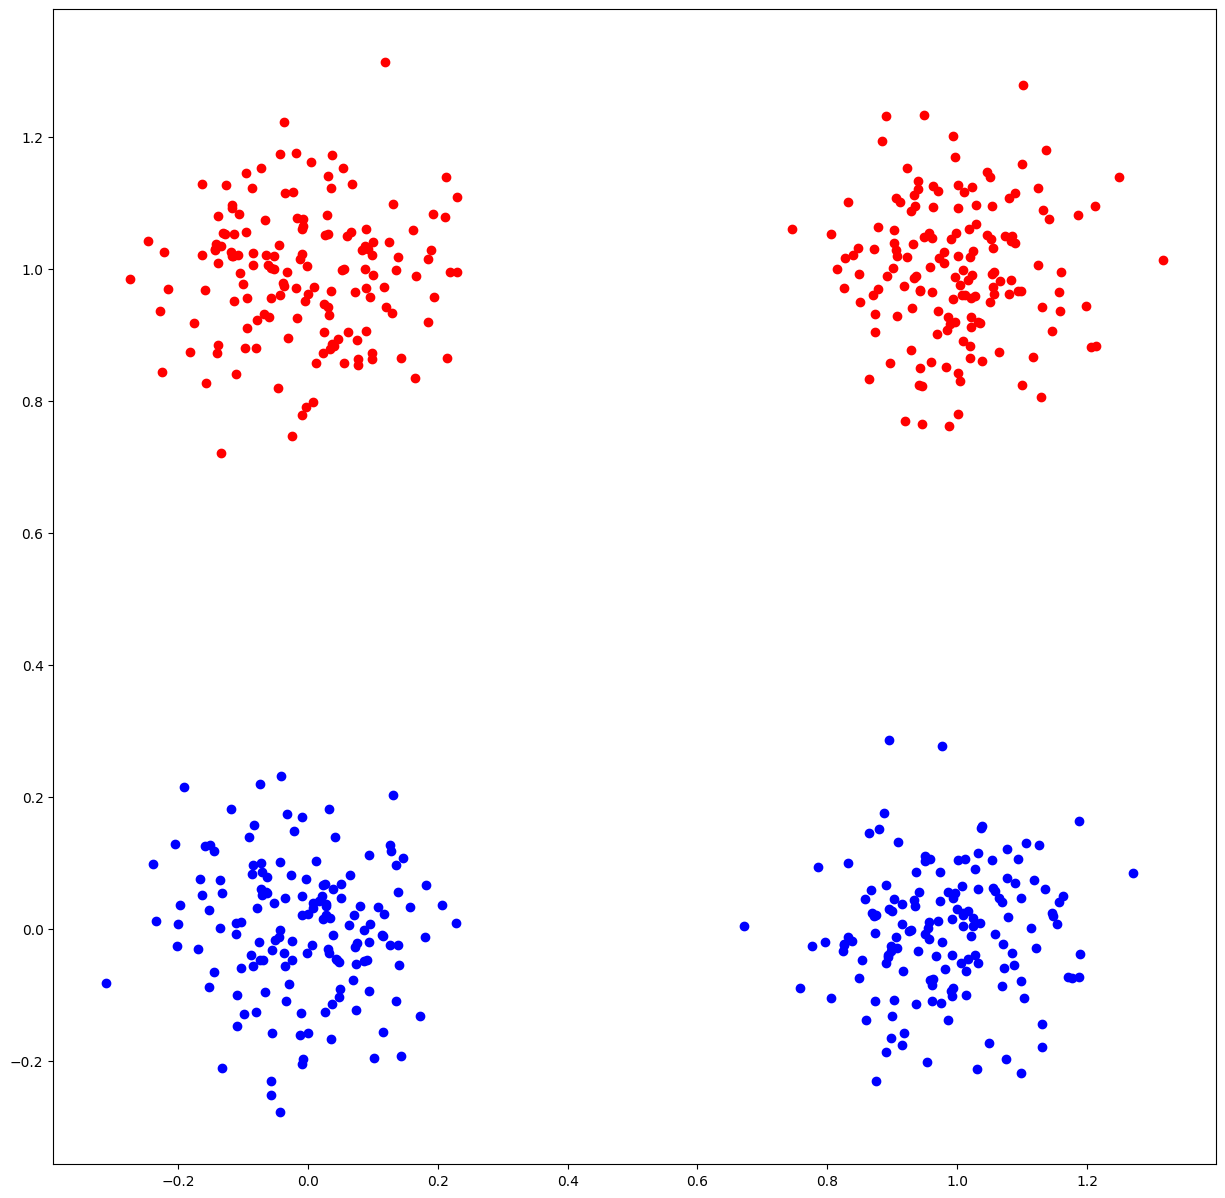

In [22]:
plt.subplots(figsize=(15, 15))

for i in range (dataset_2_splited.shape[0]):
    x = dataset_2_splited[i][0]
    y = dataset_2_splited_[i][1]
    
    if dataset_2_splited[i][2] < 1:
        y_blue = dataset_2_splited[i][1]
        plt.scatter(x, y_blue, c='blue')
    else:
        y_red = dataset_2_splited[i][1]
        plt.scatter(x, y_red, c='red')

        
plt.show()

In [23]:
u0, u1, u2 = learning_process(dataset_2_splited_, intervalos_pesos_1, taxa_aprendizagem[0])

Época 1
596 alterações na época 1
------------------------------
Época 2
599 alterações na época 2
------------------------------
Época 3
600 alterações na época 3
------------------------------
Passaram 3 épocas
Ocorreram 1795 ajustes de peso
Pesos finais: [-0.35511682 -0.15194638  0.84336465]


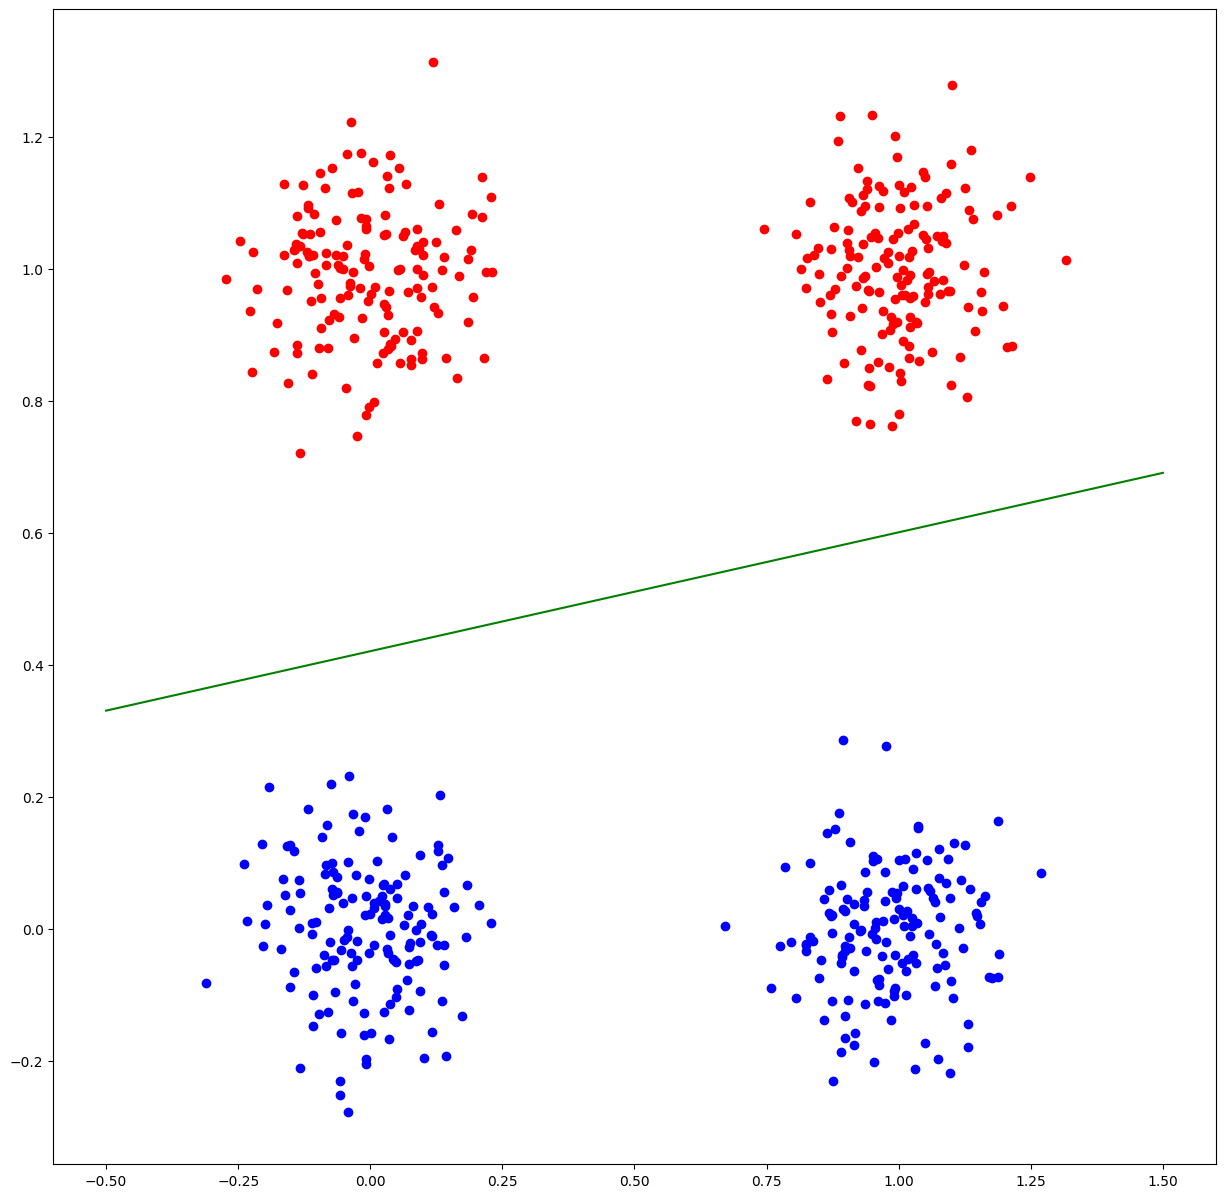

In [24]:
plt.subplots(figsize=(15, 15))

c, mx =  find_line(u0, u1, u2)
x1 = np.linspace(-0.5, 1.5, 10)
y1 = mx*x1 - c

plt.plot(x1, y1, 'green')

for i in range(dataset_2_splited.shape[0]):
    x = dataset_2_splited[i][0]
    y = dataset_2_splited[i][1]
    if dataset_2_splited[i][2] < 1:
        y_blue = dataset_2_splited[i][1]
        plt.scatter(x, y_blue, c='blue')
    else:
        y_red = dataset_2_splited[i][1]
        plt.scatter(x, y_red, c='red')


plt.show()

In [25]:
print(dataset_2_splited.shape)
print(x1.shape)

(600, 3)
(10,)
